# Term Project - Jupyter Notebook

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ozlem Ozmen

#### According to UCF Golden rules of academic ethics and honesty, plagiarism is not acceptable under any circumstances. 

### Title: Statistical Analysis of Airbnb Rates in New York City
### Team Number: 29
#### Team Members Names: Duyen Nguyen, Alexa Schultz, Amber Chiotasso, Cristonique Basden, Taylor Pitts, and Stephen McFarlane

# 1 Problem Statement : 
+ Brief problem statement in less than 200 words, based on what is mentioned on the final report.



> AirBnb hosts struggle to find appropriate and realistic rates to charge for their listings because they have little guidance on how to price them. Not knowing how to price listings can lead to oversaturated markets and unreasonably priced units. Hosts must determine a price that is fair to both themselves and their guests, based on factors including locations, number of reviews, room types, and availability.

> The objective of this project was to create a forecast model that could assist AirBnb hosts in determining a realistic and appropriate price for their listing. This forecast model is based off variables that include mentioned factors. From the forecast model, hosts are able to price fairly and make the profit their listing warrants. Additionally, this forecast model helps renters get fair prices on the places they are staying.



# 2 Dataset : 

+ Summarize the dataset you chose for this project in 100-200 words, along with a legitimate reference for your dataset resource.

> The New York City AirBnb Open dataset from Kaggle database was used for this project. The information in the dataset allowed us to analyze the different prices of units based on varying factors that include neighborhoods, locations, number of reviews, room types, and availability. These factors allow hosts to price their listings more appropriately based on current market rates.

> As you can see from the dataset consisting of nearly 50 000 rows, New York City AirBnbs are oversaturated, very competitive in nature, and the prices of listings are high. For these reasons it was the chosen city for our dataset. This oversaturation and overpriced listing trend seen in New York City is beginning to be seen in other cities. These other cities can use the information gathered from the results of this dataset to make future predictions and trends. 

> Ultimately, by analyzing the competitive nature of NYC AirBnbs along with identifying the factors that influence their rates, we are able to predict fair prices that ensures both customer satisfaction and sufficient profits. 

+ Data Reference: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

 



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
# Load csv file to the notebook
airbnb = pd.read_csv('https://raw.githubusercontent.com/duyen21/G29-project/main/AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Drop columns that are not significant
airbnb.drop(['id','name','host_id','host_name','last_review'], axis=1, inplace=True)
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [4]:
# Check if there is any duplicates
airbnb.duplicated().sum()

0

In [5]:
# Evaluate missing data
airbnb.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Replace all NaN values in 'reviews_per_month' with 0 and exam changes
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

# 3 Model:

+ Brief description of your model in less than 200 words.
>The models used for the data analysis are linear regression and random forest regression modeling. Between the two models, random forest regression is expected to be more accurate, but both models will be used and then compared. Linear regression modeling includes using a single decision tree to determie the affects the independent variables have on the dependent variable. The random forest regresison modeling includes using multiple decision trees complex enough to determine how different variables affect the overall independent variable more accurately, which is the price of Airbnb listings. 
>The open data source used from Kaggle provides many complex variables that can affect the Airbnb pricing, such as accomodation sizes, number of host reviews, locations in neighborhoods and neighborhood groups, longitudes and latitudes in the NYC area, and availability. Therefore, by having so many independent variables in determining Airbnb pricing, random forest regression modeling is more appropriate.
+ Include any mathematical equations or supporting theory to your project.
>The mathematical equation used for linear regression is given by y= Ax + c, where y is the dependent variable, x is the explanatory variable, A is the slope and c is the intercept. Random forest modeling is much more complex because it uses multiple independent variables with many decision trees rather than one. 

# 4 Implementation:


In [7]:
# Integer encoding categorical data (columns: 'neighbourhood_group', 'neighbourhood', and 'room_type')
all_neighbourhood_groups = list(airbnb['neighbourhood_group'].unique())
neighbourhood_groups_map = {}
for i in range(len(all_neighbourhood_groups)):
    neighbourhood_groups_map[all_neighbourhood_groups[i]] = i

all_neighbourhoods = list(airbnb['neighbourhood'].unique())
neighbourhoods_map = {}
for i in range(len(all_neighbourhoods)):
    neighbourhoods_map[all_neighbourhoods[i]] = i

all_rooms = list(airbnb['room_type'].unique())
rooms_map = {}
for i in range(len(all_rooms)):
    rooms_map[all_rooms[i]] = i
    
df = airbnb.replace({'neighbourhood_group': neighbourhood_groups_map, 'neighbourhood': neighbourhoods_map, 'room_type': rooms_map})
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,70,2,0,0.00,2,9
48891,0,21,40.70184,-73.93317,0,40,4,0,0.00,2,36
48892,1,2,40.81475,-73.94867,1,115,10,0,0.00,1,27
48893,1,7,40.75751,-73.99112,2,55,1,0,0.00,6,2


In [8]:
# Independent variables (feature matrix): neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365.
feature_columns = []
for c in list(df.columns):
    if c != 'price':
        feature_columns.append(c)
feature_columns = df[feature_columns]
feature_columns

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,1,9,0.21,6,365
1,1,1,40.75362,-73.98377,1,1,45,0.38,2,355
2,1,2,40.80902,-73.94190,0,3,0,0.00,1,365
3,0,3,40.68514,-73.95976,1,1,270,4.64,1,194
4,1,4,40.79851,-73.94399,1,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,2,0,0.00,2,9
48891,0,21,40.70184,-73.93317,0,4,0,0.00,2,36
48892,1,2,40.81475,-73.94867,1,10,0,0.00,1,27
48893,1,7,40.75751,-73.99112,2,1,0,0.00,6,2


In [9]:
# Dependent variable (target vector): price
target_column = df['price']
target_column

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [10]:
# Split dataset, 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size=0.2, random_state=42)

In [11]:
# Run Linear Regression

Model_LR = LinearRegression().fit(x_train, y_train)
pred_LR = Model_LR.predict(x_test)

print('Train R2:', Model_LR.score(x_train, y_train))
print('Test R2 ', r2_score(y_test,pred_LR))

Train R2: 0.06667846995050042
Test R2  0.08416186760786737


In [12]:
# Run Random Forest
Model_RFR = RandomForestRegressor(random_state=10).fit(x_train, y_train)

train_pred_RFR =  Model_RFR.predict(x_train)
pred_RFR = Model_RFR.predict(x_test)

print('Train R2 ', r2_score(y_train,train_pred_RFR))
print('Test R2 ', r2_score(y_test,pred_RFR))

Train R2  0.8731169046086205
Test R2  0.053106826580480715


# 5 Visualization : 

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

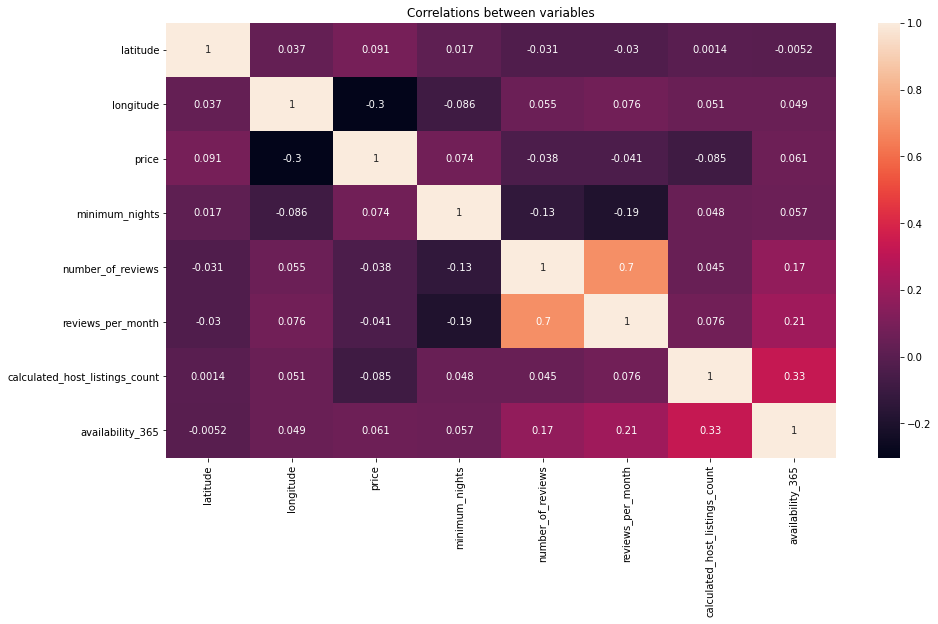

In [13]:
# Graph correlation matrix
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
plt.title("Correlations between variables")

sns.heatmap(corr, annot=True)
airbnb.columns

/Users/duyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of listings per neighbourhood group')

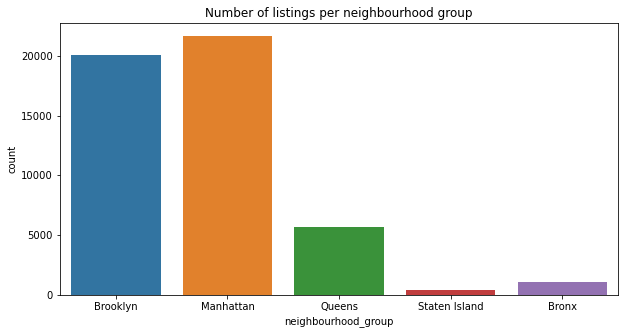

In [14]:
# Graph the number of listings per neighbourhood group
sns.countplot(airbnb['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Number of listings per neighbourhood group')

Text(0.5, 1.0, 'Availability per neighbourhood group')

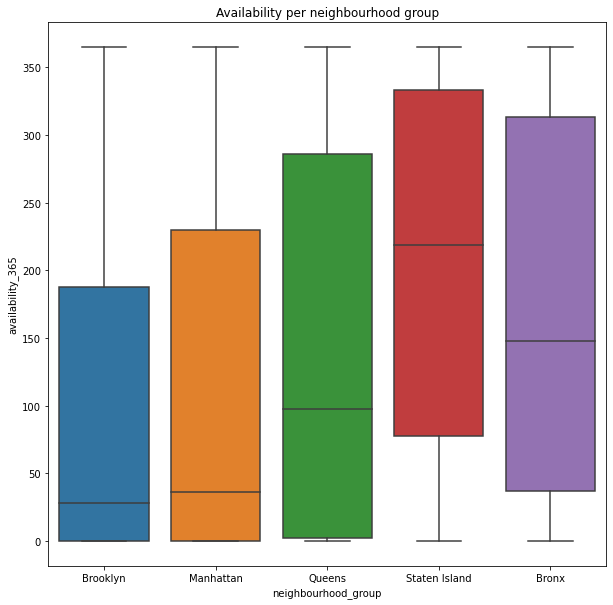

In [15]:
# Graph availability per neighbourhood group
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')
plt.title('Availability per neighbourhood group')

/Users/duyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


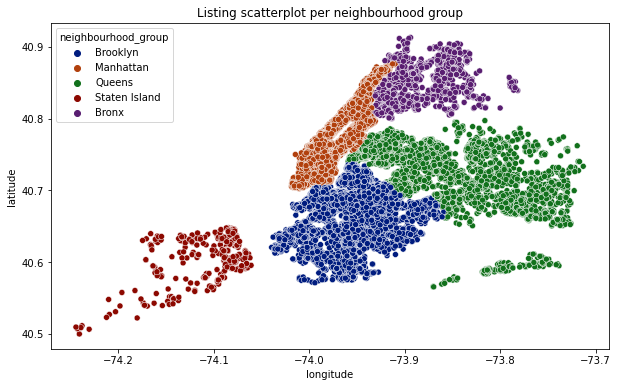

In [16]:
# Graph listing scatterplot per area
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group, palette="dark")
plt.title('Listing scatterplot per neighbourhood group')
plt.ioff()

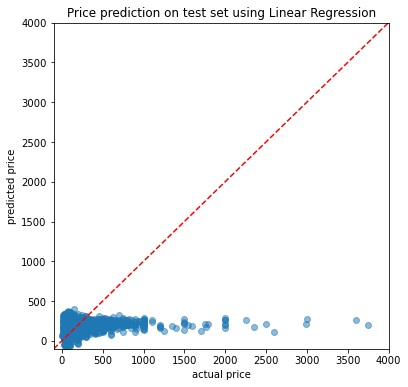

In [17]:
#Graph price prediction on test set using Linear Regression
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, pred_LR, alpha=0.5)
plt.xlim([-100,4000])
plt.ylim([-100,4000])

plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("Price prediction on test set using Linear Regression")

ax.plot([-100,4000],[-100,4000], linestyle='--', c='r')


plt.show()

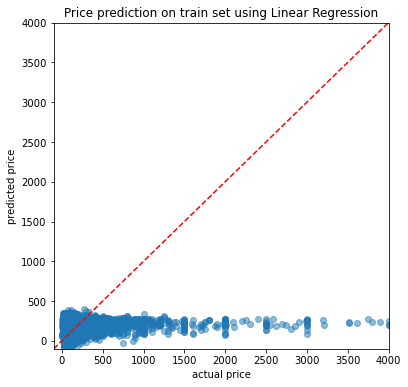

In [18]:
#Graph price prediction on train set using Linear Regression
train_pred = Model_LR.predict(x_train)

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train, train_pred, alpha=0.5)
plt.xlim([-100,4000])
plt.ylim([-100,4000])

plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("Price prediction on train set using Linear Regression")

ax.plot([-100,4000],[-100,4000], linestyle='--', c='r')

plt.show()

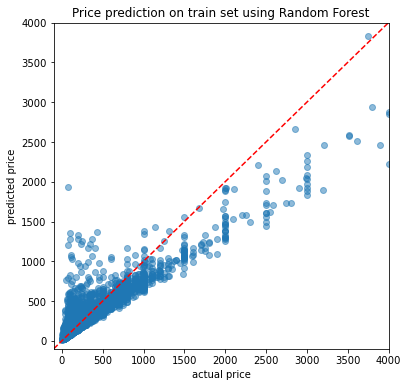

In [19]:
#Graph price prediction on train set using Random Forest
train_pred = Model_RFR.predict(x_train)

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train, train_pred, alpha=0.5)
plt.xlim([-100,4000])
plt.ylim([-100,4000])

plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("Price prediction on train set using Random Forest")

ax.plot([-100,4000],[-100,4000], linestyle='--', c='r')


plt.show()

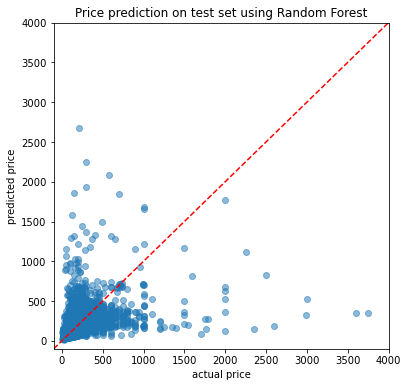

In [20]:
#Graph price prediction on test set using Random Forest
f, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_test, pred_RFR, alpha=0.5)
plt.xlim([-100,4000])
plt.ylim([-100,4000])

plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("Price prediction on test set using Random Forest")

ax.plot([-100,4000],[-100,4000], linestyle='--', c='r')
plt.show()

Text(0.5, 1.0, 'Feature importances')

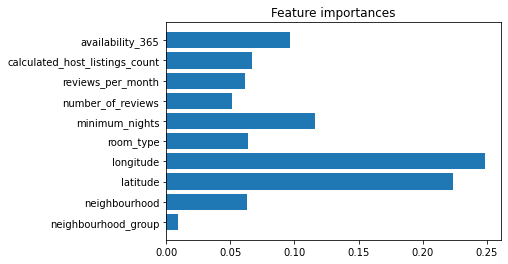

In [21]:
#Graph feature importances
imps = list(Model_RFR.feature_importances_)
features_names = list(x_train.columns)
plt.barh(range(len(imps)), imps)
plt.yticks(range(len(imps)), features_names)
plt.title("Feature importances")


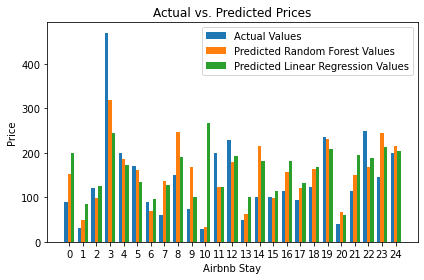

In [22]:
# Creation of triple bar chart

num_indices = 25 # Number of values to show
width = 0.25 # Width of each bar on triple bar chart
x_index = np.arange(num_indices) # Array of integers from 0 to num_indices

# Create figure and axes for triple bar chart
fig, ax = plt.subplots()

# Calculate and graph each bar: actual, predicted RF, and predicted LR
actual_bar = ax.bar(x_index - width, y_test.head(num_indices), width, label='Actual Values')
RF_bar = ax.bar(x_index, pred_RFR[0:num_indices], width, label='Predicted Random Forest Values')
LR_bar = ax.bar(x_index + width, pred_LR[0:num_indices], width, label='Predicted Linear Regression Values')

# Set bar chart axes, labels, and title
ax.set_xlabel('Airbnb Stay')
ax.set_ylabel('Price')
ax.set_title('Actual vs. Predicted Prices')
ax.set_xticks(x_index)

# Show legend of labels for each bar
ax.legend()

# Improve readability of bar chart
fig.tight_layout()

# Show plot
plt.show()

<ipython-input-23-e1711fe0bcf4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(longitude_range, visible=True,)


[Text(-74.3, 0, '-74.24'),
 Text(-74.3, 1, '-74.24'),
 Text(-74.2, 0, '-74.17'),
 Text(-74.2, 1, '-74.17'),
 Text(-74.1, 0, '-74.09'),
 Text(-74.1, 1, '-74.09'),
 Text(-74.0, 0, '-74.02'),
 Text(-74.0, 1, '-74.02'),
 Text(-73.9, 0, '-73.94'),
 Text(-73.9, 1, '-73.94'),
 Text(-73.8, 0, '-73.86'),
 Text(-73.8, 1, '-73.86'),
 Text(-73.69999999999999, 0, '-73.79'),
 Text(-73.69999999999999, 1, '-73.79'),
 Text(-73.6, 0, ''),
 Text(-73.6, 1, '')]

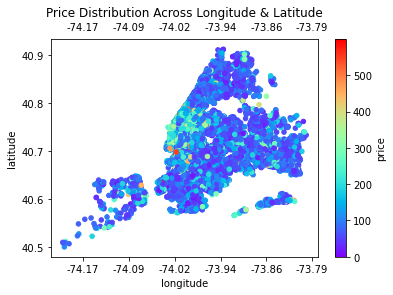

In [23]:
# Creation of Heat Map Scatter Plot

# Generate the heat map scatter plot and specifying parameters 
ax=df[df.price<600].plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('rainbow'),title='Price Distribution Across Longitude & Latitude',colorbar=True)

# Creating the range for the x-axis 
longitude_range = np.round(np.arange(min(df.longitude), max(df.longitude), (max(df.longitude)-min(df.longitude)) / 7  ), 2)

# Creating the labels and tickmarks for the x-axis
ax.set_xlabel('longitude', visible=True)
ax.set_xticklabels(longitude_range, visible=True,)


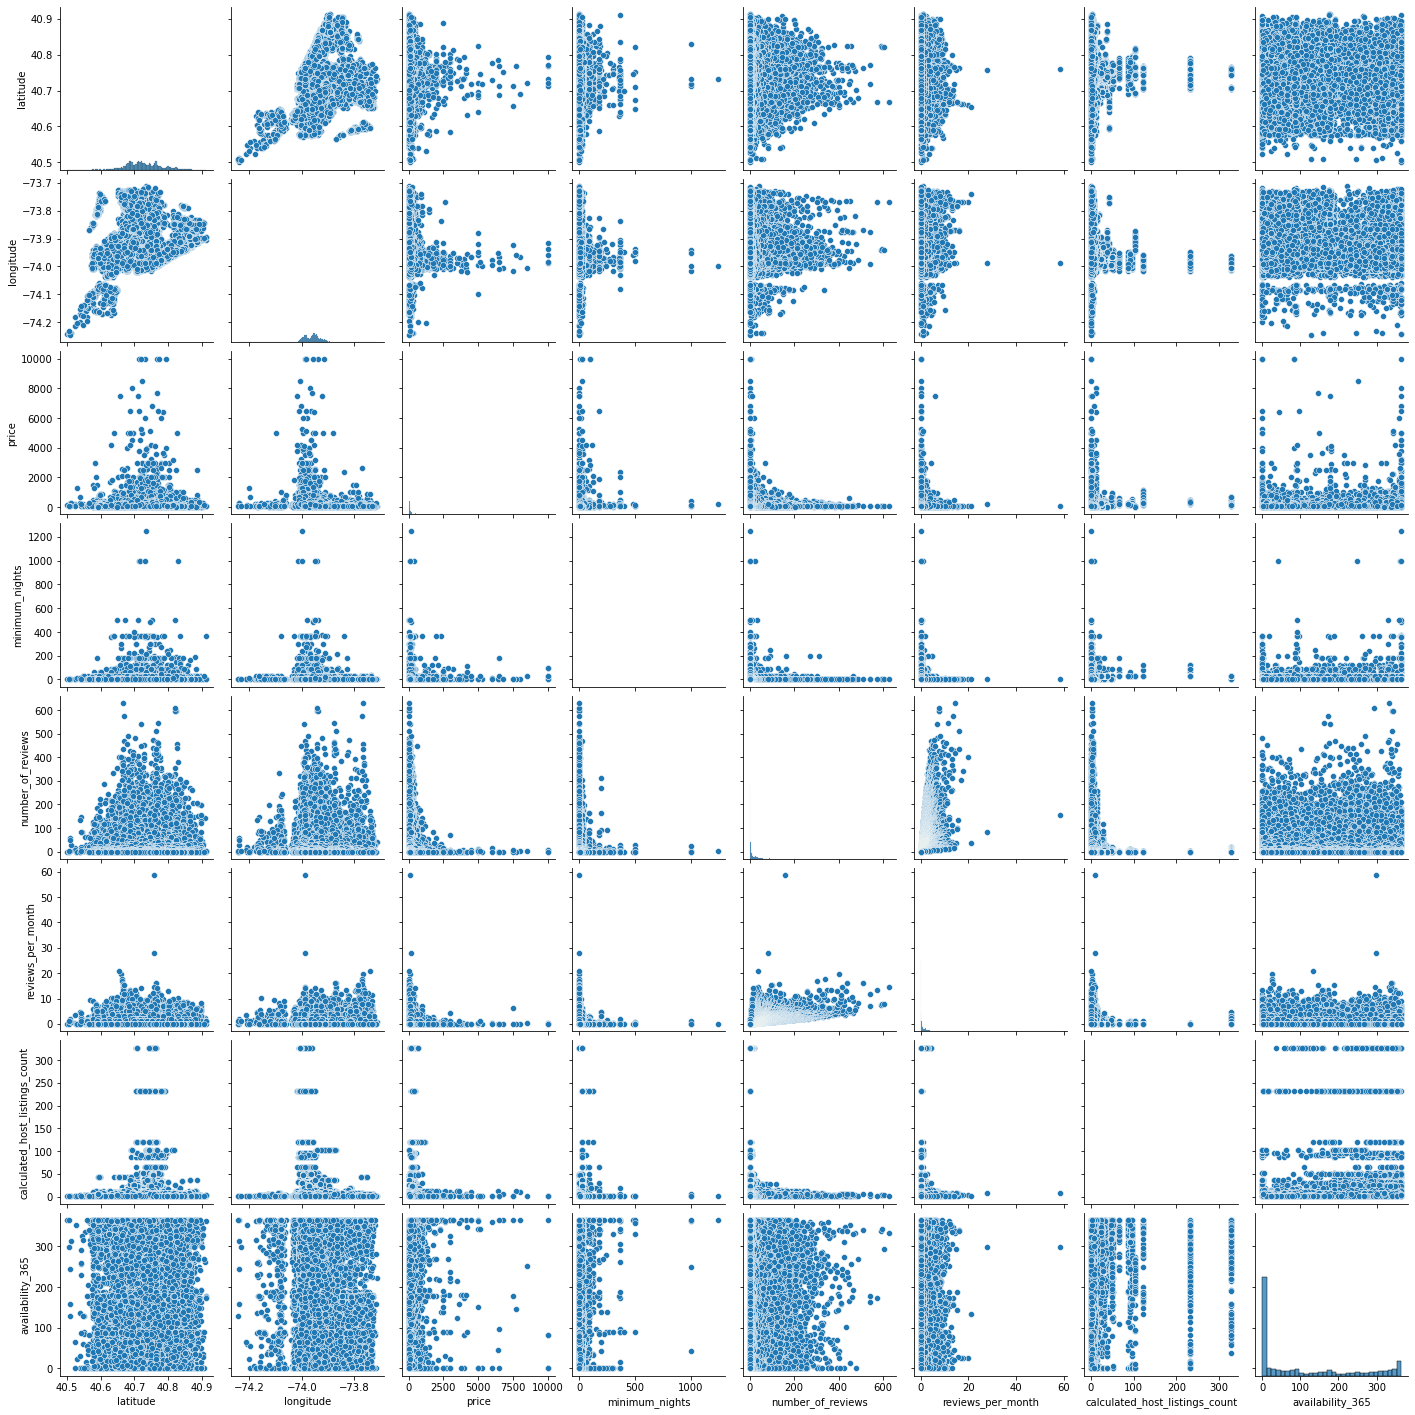

In [24]:
# Creation of pairplots 
sns.pairplot(airbnb)

/Users/duyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/duyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/duyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

Text(0.5, 0.98, 'Correlation Between Price & Airbnb Features')

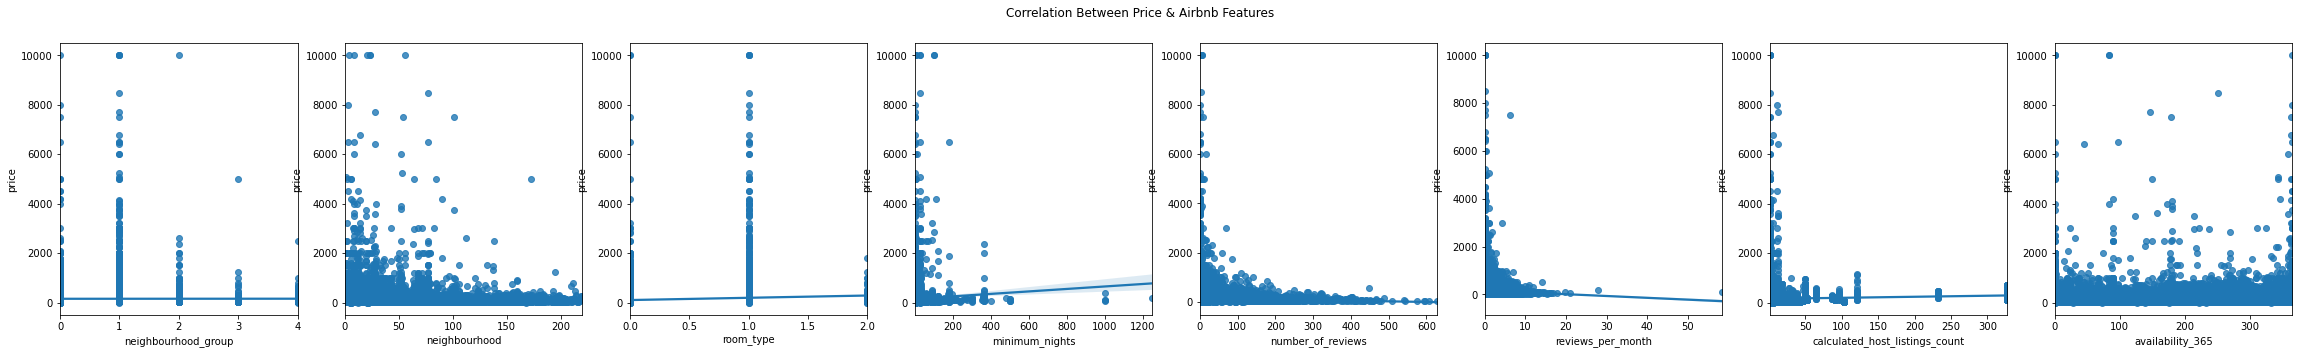

In [25]:
# Creation of scatter plots for establishing the relationships between the various independent variables and price

# Defining the number of scatter plots and their size 
fig, axes1 = plt.subplots(1,8, figsize=(40,5)) 

# Generating the plots from the dataframe
sns.regplot('neighbourhood_group', 'price', data = df, ax=axes1[0])
sns.regplot('neighbourhood', 'price', data = df, ax=axes1[1])
sns.regplot('room_type', 'price', data = df, ax=axes1[2])
sns.regplot('minimum_nights', 'price', data = df, ax=axes1[3])
sns.regplot('number_of_reviews', 'price', data = df, ax=axes1[4])
sns.regplot('reviews_per_month', 'price', data = df, ax=axes1[5])
sns.regplot('calculated_host_listings_count', 'price', data = df, ax=axes1[6])
sns.regplot('availability_365', 'price', data = df, ax=axes1[7])

# Creating the labels for each plot 

axes1[0].set_xlabel('neighbourhood_group')
axes1[0].set_ylabel('price')

axes1[1].set_xlabel('neighbourhood')
axes1[1].set_ylabel('price')

axes1[2].set_xlabel('room_type')
axes1[2].set_ylabel('price')

axes1[3].set_xlabel('minimum_nights')
axes1[3].set_ylabel('price')

axes1[4].set_xlabel('number_of_reviews')
axes1[4].set_ylabel('price')

axes1[5].set_xlabel('reviews_per_month')
axes1[5].set_ylabel('price')

axes1[6].set_xlabel('calculated_host_listings_count')
axes1[6].set_ylabel('price')

axes1[7].set_xlabel('availability_365')
axes1[7].set_ylabel('price')

# Creating the title for all of the plots 
fig.suptitle('Correlation Between Price & Airbnb Features')